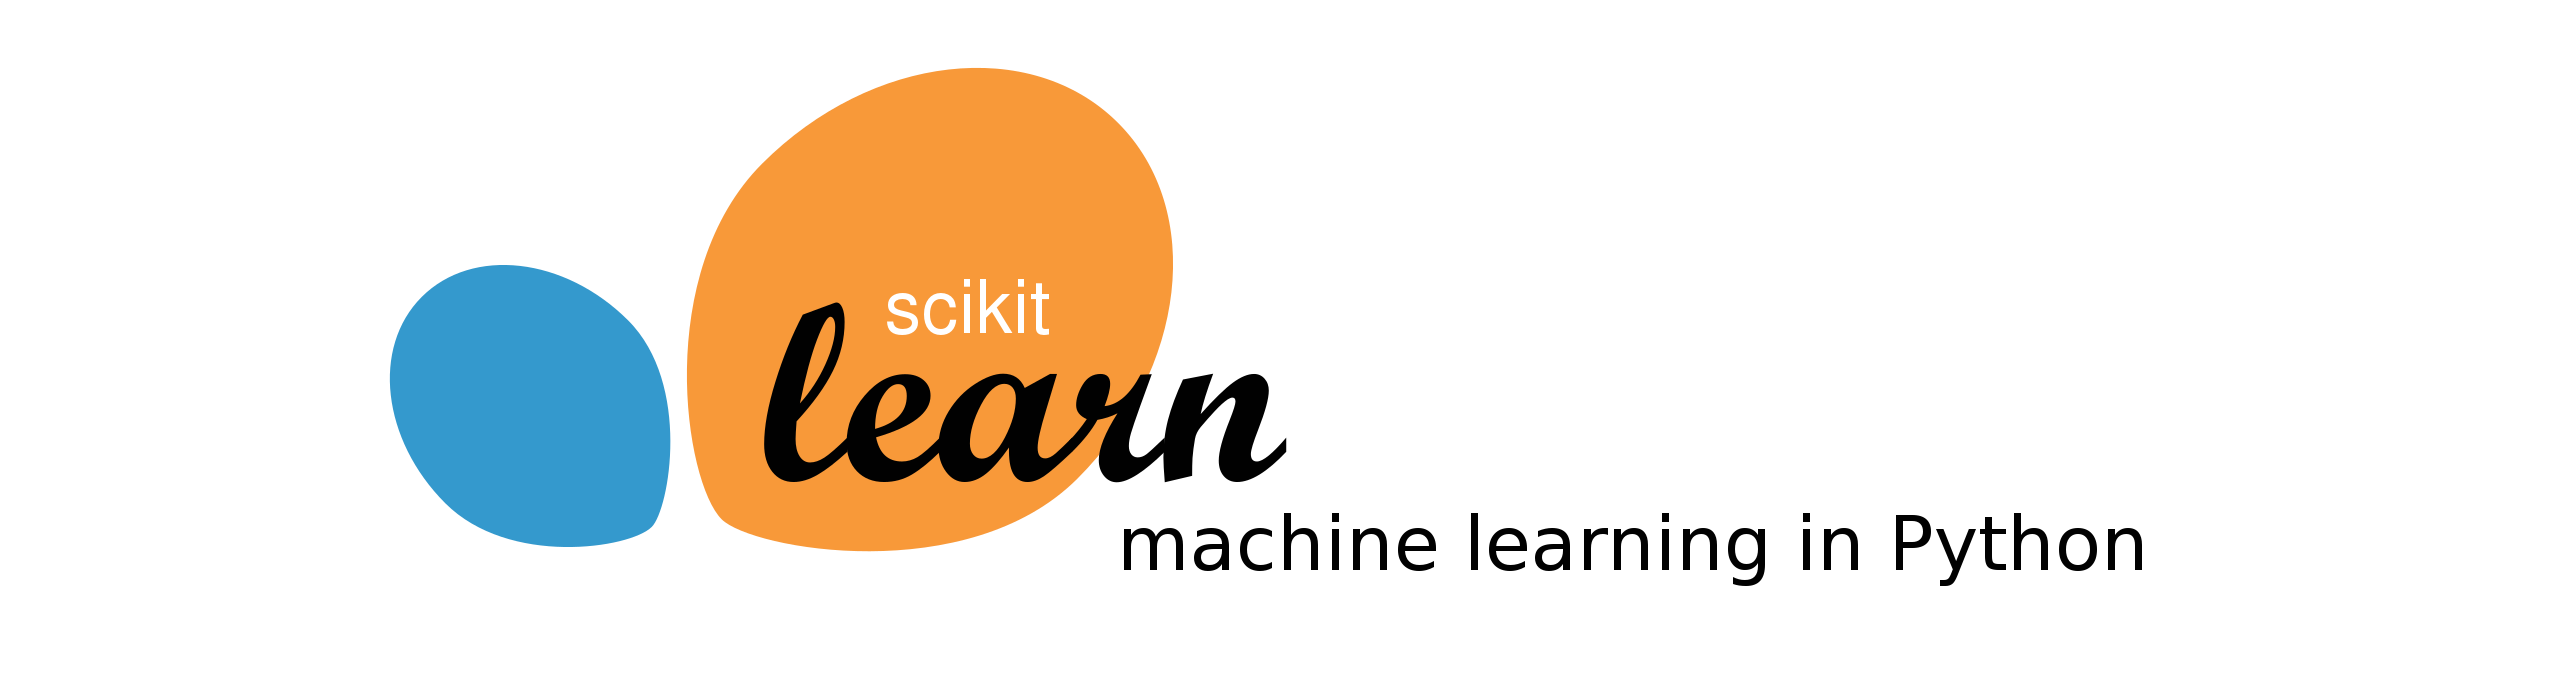

# My favorite Scikit-Learn algorithms

This notebook contains a demonstrations and visualisations of my three favorite algorithms available through scikit-learn Python library [1]. 

***

## 1. Machine Learning

**Machine learning** is a study field that looks at using computational algorithms to turn empirical data into usable models. It developed from traditional statistics and artificial intelligence. From the efforts of mega corporations such as Google, Microsoft, Facebook, Amazon, and so on, machine learning has become one of the hottest computational science topics in the last decade. [9]
We can use machine learning algorithms to:
* gather understanding of the cyber phenomenon that produced the data under study
* abstract the understanding of underlying phenomena in the form of a model
* predict future values of a phenomena using the above-generated model, and 
* detect anomalous behavior exhibited by a phenomenon under observation 

***

## 2. Choosing Scikit-Learn: The Benefits

`Scikit-learn` is one of the most useful open-source libraries available for Python, widely used for machine learning purposes. It contains large collection of very efficient statistical and machile learning tools, e.g. regression, classification, dimensionary reduction and clustering.
It has been developed by David Cournapeau initially and it developed in the communicity-driven project where anyone can contribute towards its development. It is built upon `NumPy` [4], `SciPy` [5] and `Matplotlib` [6].


As mentioned, scikit-learn comes with plenty of interesting features. Some of which are:
* **Supervised learning argorithms**, e.g. Linear regression, Decision Trees, Bayesian methods
* **Unsupervised learning algorithms** e.g. custer analysis, factoring, unsupervised neural networks
* **Feature extraction**, meaning you can extract features from pictures or text
* **Cross validation**, meaning that validity of supervised models on unseen data can be validated and checked for accuracy
* **Dimensionality reduction**, meaning a number of attributes in data can be reduced for subsequent visualization, summarization or feature selection
* **Clustering** i.e. grouping of unlabeled data
* **Ensemble methods**, meaning predictions of several supervised models combines

Scikit-learn is a great choice of library for machine learning and there are many benefits to it:
* It is free with minimum licencing restrictions
* It is user friendly and easy to use
* It is versatile and useful for different real-life situations
* Provides clear and useful documentations for both end users or users who want to implement the algorithms to their own platforms

### 2.1 Installing Scikit-Learn

There are some prerequisites, so make sure you have the following installed:
* Python (>=3.5)
* NumPy (>=1.11.0)
* SciPy (>=0.17.0)
* Joblib (>=0.11)
* Matplotlib (>=1.5.1)
* Pandas (>=0.18.0)

All instructions with regards to installation can be found in the main documentation of `scikit-learn` library [2]. For more information refer to [this link](http://scikit-learn.org/stable/install.html). Anaconda [3] comes with `scikit-learn` by default, but, if needed it can be installed manually by typing `conda install scikit-learn` in a terminal.

***

## 3. Playing with Algorithms

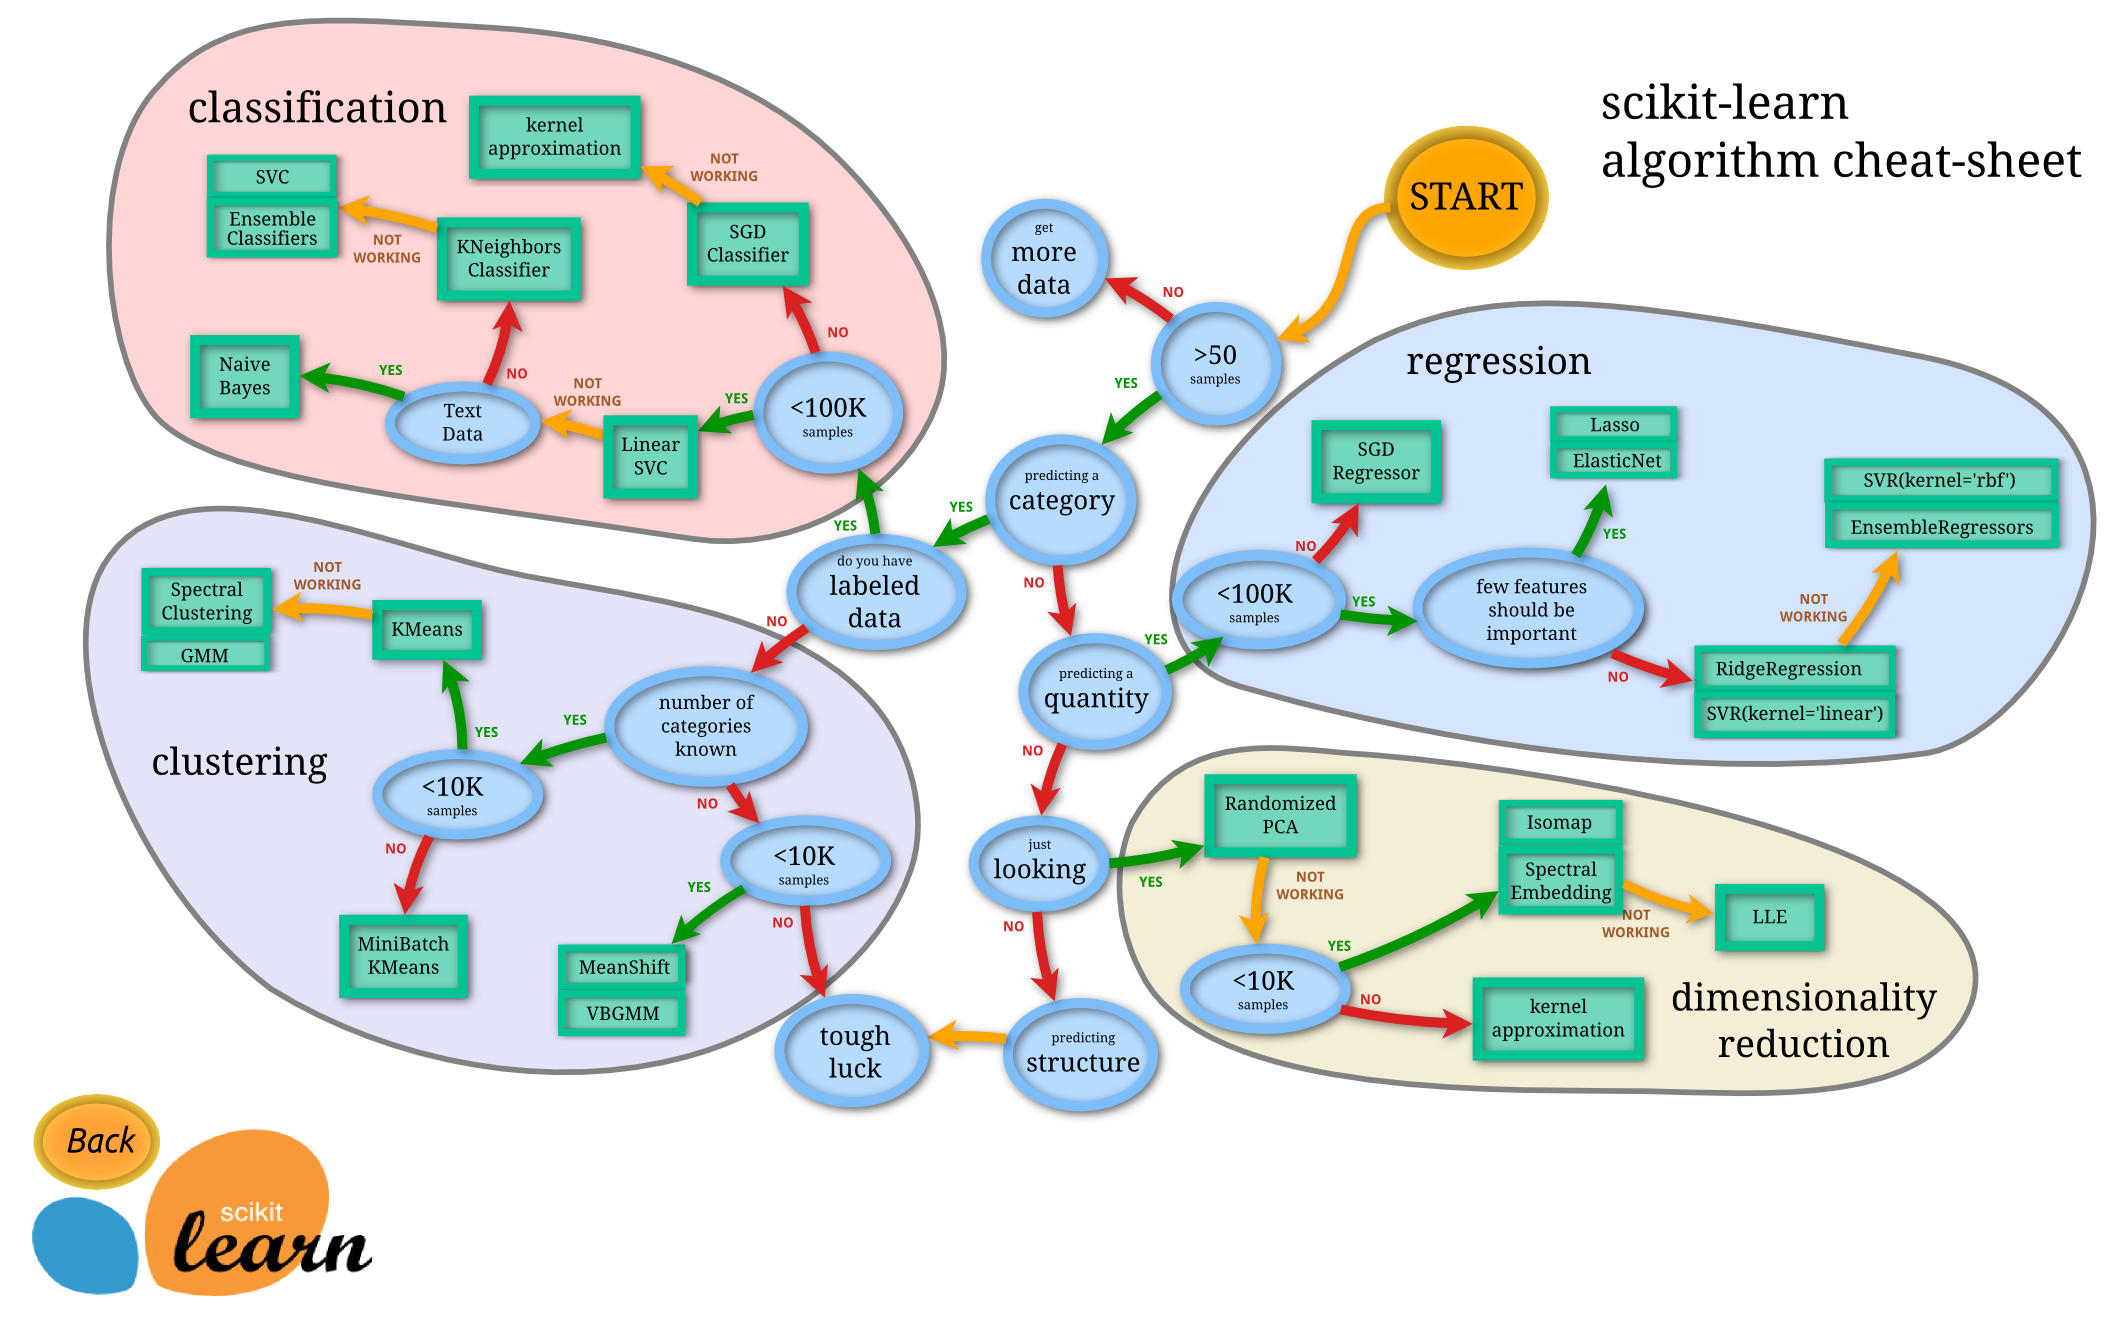

## 3.1. Explore the data

### Regression

One of my favorite algorithams available in `scikit-learn` is **regression**. Regression is a statistical method used in finance, investing, and other disciplines that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables).[10]

In [1]:
#Importing relevant modules.
import numpy as np
import pandas as pd
import matplotlib.pylab as ply
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.style.use('ggplot')

I want to explore fish market dataset, which lists weight, length, hight and width of each fish and the spieces of the fish, classified in seven spieces: Perch, Bream, Roach, Pike, Smelt, Parkki and Whitefish. I want to see whether I can predict one of the fish attributes with other five.<br>
First, I have to check my data. Then, I will create a model using a part of the data and in the end make a prediction on the rest of the data and see how the model performed. <br>
Let's check the data first.

In [2]:
# Load dataset from csv.
df=pd.read_csv(r'C:\Users\mvukas\repo\Fish.csv')

In [3]:
# First five rows.
df.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
#Count each spiece in the dataset.
species_counts = df["Species"].value_counts().to_frame()
species_counts.reset_index(inplace=True)
species_counts.columns = ["Species","Counts"] 
species_counts

,Species,Counts
0,Perch,56
1,Bream,35
2,Roach,20
3,Pike,17
4,Smelt,14
5,Parkki,11
6,Whitefish,6


Text(0.5, 1.0, 'Species Value Counts')

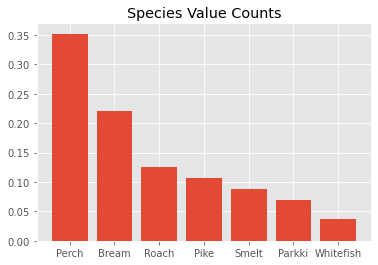

In [5]:
#Visualize fish spieces count in %.
plt.bar(species_counts["Species"], species_counts["Counts"]/sum(species_counts["Counts"]))
plt.title("Species Value Counts")

I can see that Perch is the most common spiece and Whitefish the least common in my dataset (only 6 fish).

In [6]:
#Descriptive statistics of the attributes.
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


I want to know if there is correlation between the attributes, because if there is, I cannot use correlated attributes in the model together. This would jeprodise the quality of the regression model.

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


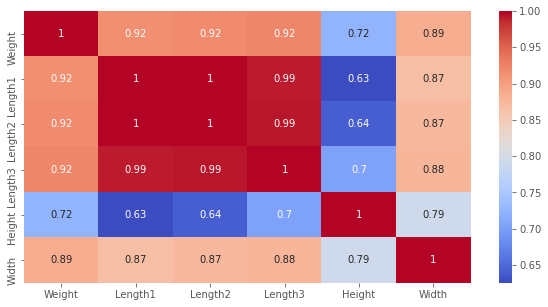

In [7]:
# Check the correlation (Pearson Correlation) between variables.
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="coolwarm",annot=True)
c

The results show quite strong correlation between the attributes, lowest being 0.63. I will assume weight would be the one that is causing this so I want to check the correlation between other variables and weight. I can use `stats.pearsonr` to check this.

In [8]:
#Checking the correlation.
pearson_coef, p_value = stats.pearsonr(df['Length1'], df['Weight'])
print("The Pearson Correlation Coefficient is:") 
print(pearson_coef)
print("P-value is:")
print(p_value)

The Pearson Correlation Coefficient is:
0.9157117160312037
P-value is:
4.749619722769783e-64


In [9]:
#Checking the correlation.
pearson_coef, p_value = stats.pearsonr(df['Length2'], df['Weight'])
print("The Pearson Correlation Coefficient is:") 
print(pearson_coef)
print("P-value is:")
print(p_value)

The Pearson Correlation Coefficient is:
0.9186177013642214
P-value is:
3.3951132290325303e-65


In [10]:
#Checking the correlation.
pearson_coef, p_value = stats.pearsonr(df['Length3'], df['Weight'])
print("The Pearson Correlation Coefficient is:") 
print(pearson_coef)
print("P-value is:")
print(p_value)

The Pearson Correlation Coefficient is:
0.9230435593620119
P-value is:
5.023191454304738e-67


In [11]:
#Checking the correlation.
pearson_coef, p_value = stats.pearsonr(df['Height'], df['Weight'])
print("The Pearson Correlation Coefficient is:") 
print(pearson_coef)
print("P-value is:")
print(p_value)

The Pearson Correlation Coefficient is:
0.7243453291993317
P-value is:
3.842341838951914e-27


In [12]:
#Checking the correlation.
pearson_coef, p_value = stats.pearsonr(df['Width'], df['Weight'])
print("The Pearson Correlation Coefficient is:") 
print(pearson_coef)
print("P-value is:")
print(p_value)

The Pearson Correlation Coefficient is:
0.8865066052433448
P-value is:
2.0381946411853594e-54


P-value for eachj result is very very low, so I can conclude that there is strong correlation between weight and other variables. Also, they are all above 0.72 so the linear relationship between them seems to be strong. Let's plot this relationship.

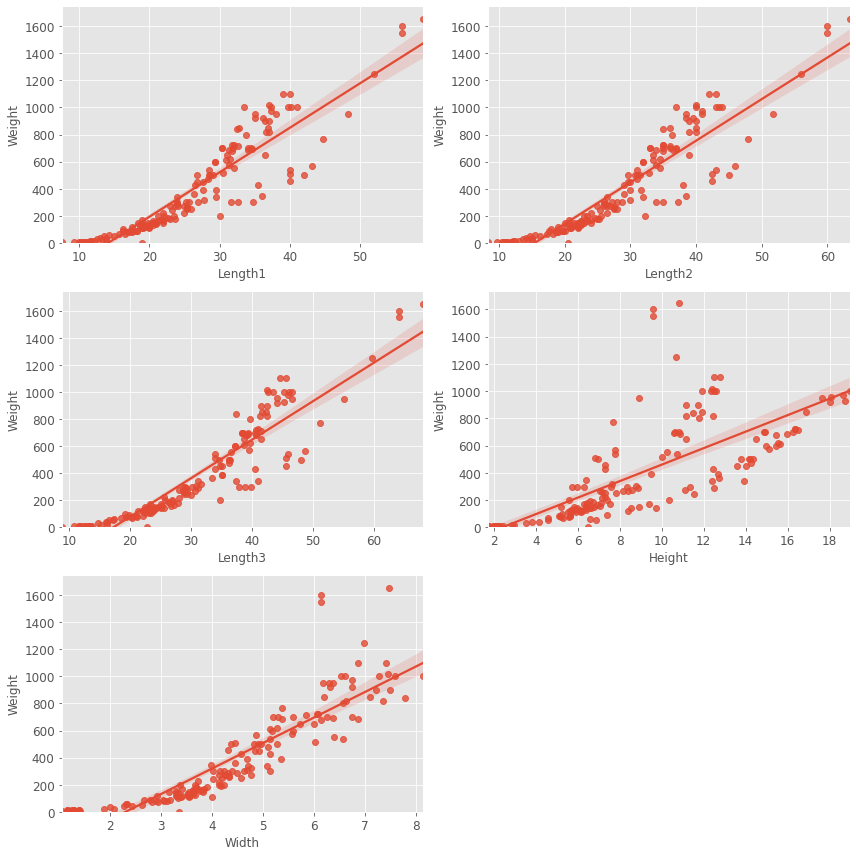

In [13]:
#Plot the linear relationship between weight and other variables.
#Subplots
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3, 2, figsize=(12,12))

sns.regplot(x="Length1", y="Weight", data=df, ax=ax1)
sns.regplot(x="Length2", y="Weight", data=df, ax=ax2)
sns.regplot(x="Length3", y="Weight", data=df, ax=ax3)
sns.regplot(x="Height", y="Weight", data=df, ax=ax4)
sns.regplot(x="Width", y="Weight", data=df, ax=ax5)

#Labels.
ax1.tick_params(labelrotation=0, labelsize=12)
ax2.tick_params(labelrotation=0, labelsize=12)
ax3.tick_params(labelrotation=0, labelsize=12)
ax4.tick_params(labelrotation=0, labelsize=12)
ax5.tick_params(labelrotation=0, labelsize=12)
ax6.tick_params(labelrotation=0, labelsize=12)

#Set y limit
ax1.set_ylim(0,)
ax2.set_ylim(0,)
ax3.set_ylim(0,)
ax4.set_ylim(0,)
ax5.set_ylim(0,)

fig.delaxes(ax6)
fig.tight_layout()

I can clearly see how as the weight increases, all lenghts, hight and width all increase as well. This nicely describes the correlation tests done above where we can see that the relationship is positive and strong. It seems to me I will be able to predict the weight with other five attributes. 

## Classification

**Classification** is the process of predicting the class of given data points. In my example, these are species of fish. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y). This way I want to predict a fish spieces using fish attributes. [11]

To do this, first I want to group the fish according to spieces and check the means of each attribute for each spiece.

In [14]:
#Group fish by spiece and check mean for all attributes
species_group = df.groupby(["Species"], as_index=False).mean()
species_group

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,617.828571,30.305714,33.108571,38.354286,15.183211,5.427614
1,Parkki,154.818182,18.727273,20.345455,22.790909,8.962427,3.220736
2,Perch,382.239286,25.735714,27.892857,29.571429,7.861870,4.745723
3,Pike,718.705882,42.476471,45.482353,48.717647,7.713771,5.086382
4,Roach,152.050000,20.645000,22.275000,24.970000,6.694795,3.657850
5,Smelt,11.178571,11.257143,11.921429,13.035714,2.209371,1.340093
6,Whitefish,531.000000,28.800000,31.316667,34.316667,10.027167,5.473050


I want to visualize if the weight, height, width and lengths would be good predictors of the spieces. Just looking at the numbers it seems that each spieces has something unique which defines them, but it's better to visualize.

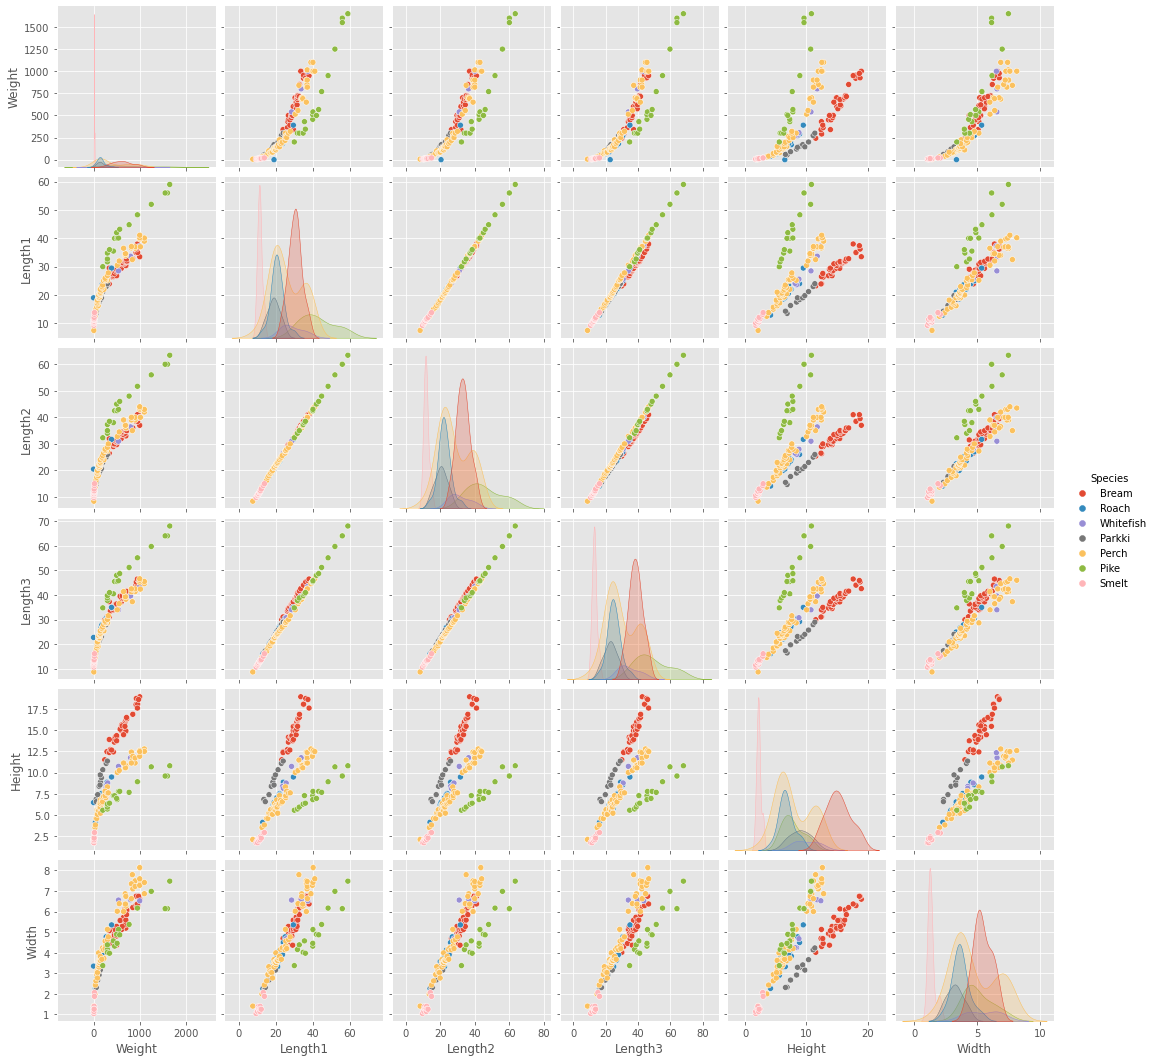

In [15]:
#Scatter plot.
sns.pairplot(data=df,hue='Species')

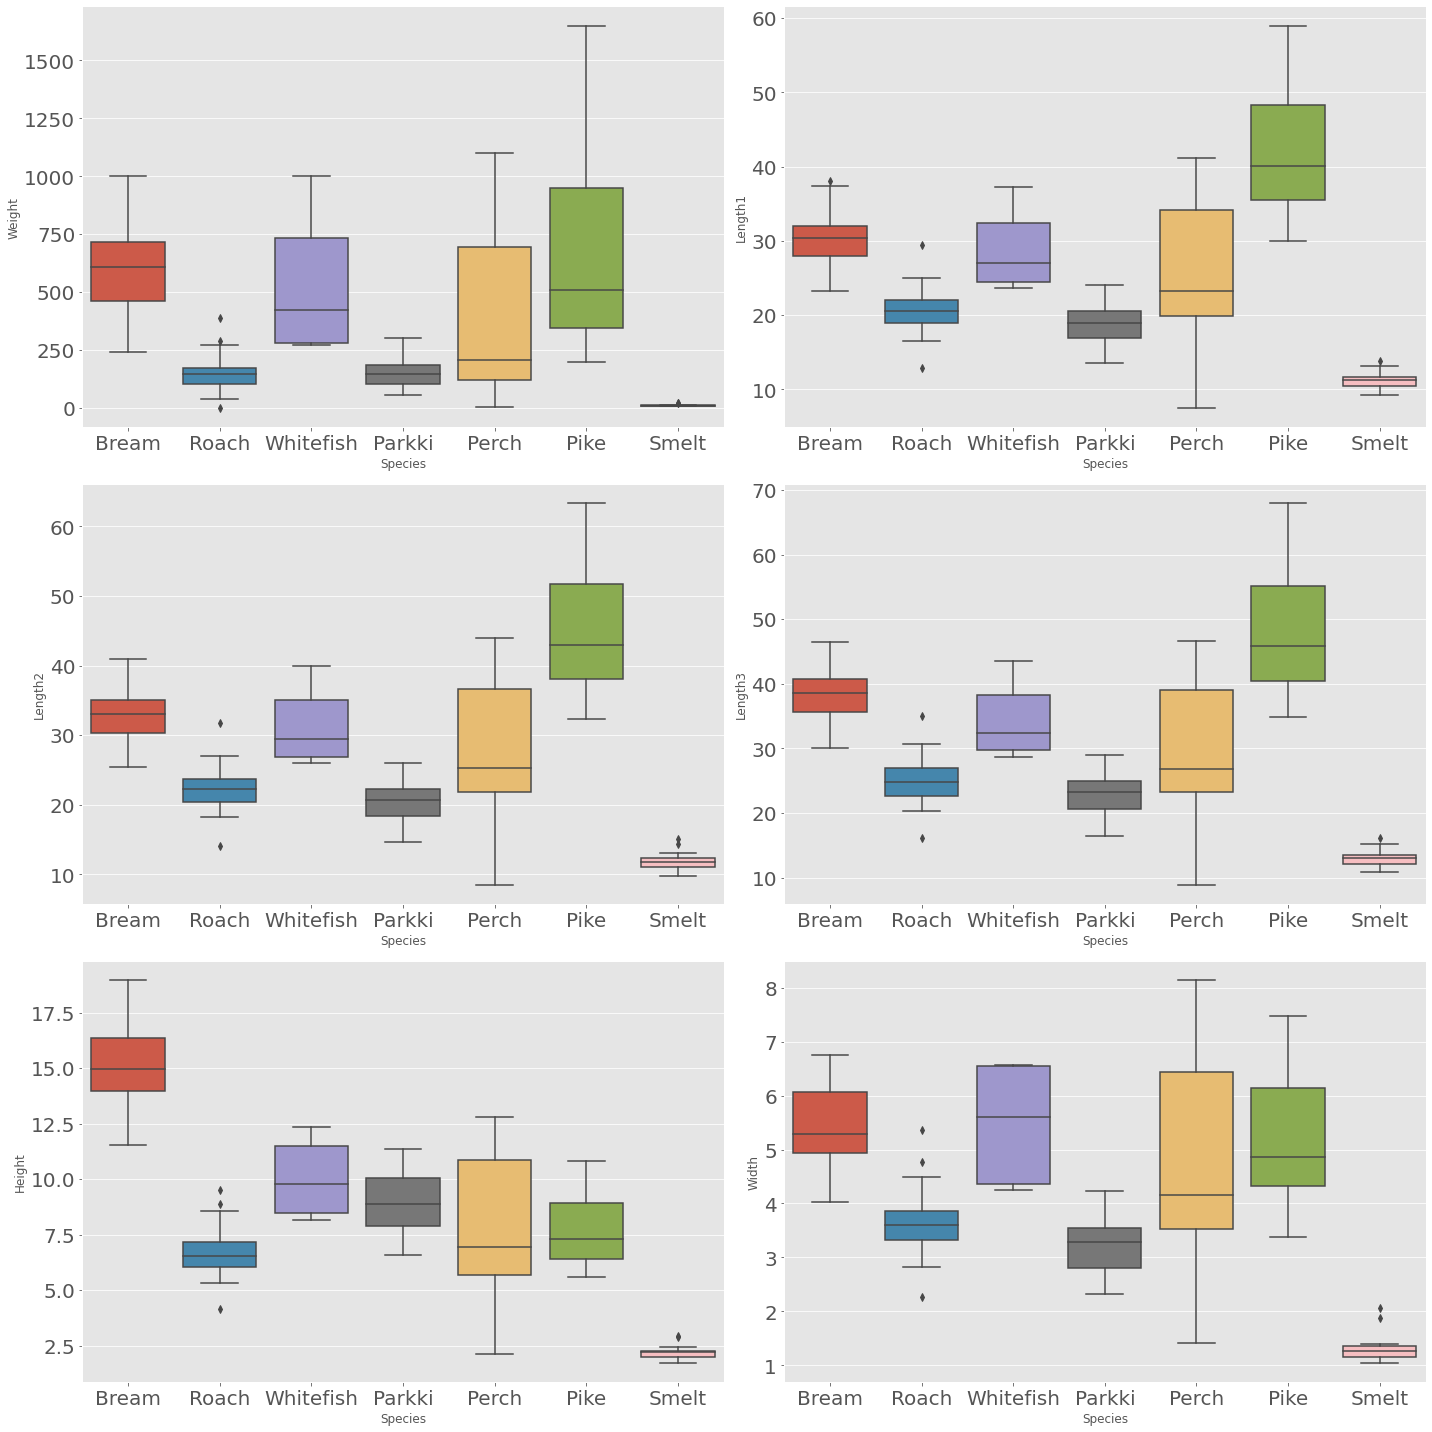

In [16]:
#Boxplot.
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3, 2, figsize=(20,20))
sns.boxplot(x="Species", y="Weight", data=df, ax=ax1)
sns.boxplot(x="Species", y="Length1", data=df, ax=ax2)
sns.boxplot(x="Species", y="Length2", data=df, ax=ax3)
sns.boxplot(x="Species", y="Length3", data=df, ax=ax4)
sns.boxplot(x="Species", y="Height", data=df, ax=ax5)
sns.boxplot(x="Species", y="Width", data=df, ax=ax6)
ax1.tick_params(labelrotation=0, labelsize=20)
ax2.tick_params(labelrotation=0, labelsize=20)
ax3.tick_params(labelrotation=0, labelsize=20)
ax4.tick_params(labelrotation=0, labelsize=20)
ax5.tick_params(labelrotation=0, labelsize=20)
ax6.tick_params(labelrotation=0, labelsize=20)
fig.tight_layout()

There is some overlapping, however certain spieces do stand out!I am looking forward to see the outcome.

### Cleaning data: Outliers & Incorrect data
In order to tidy up the data a bit before staring with my predictions, I want to check if there are any outliers and windsorize them.

<AxesSubplot:xlabel='Weight'>

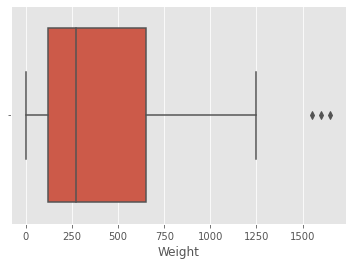

In [17]:
# Boxplot of weight column.
sns.boxplot(x=df['Weight'])

Text(0.5, 0, 'cm')

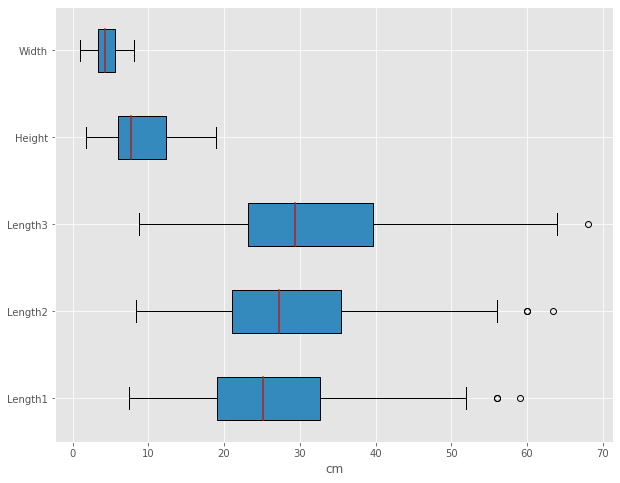

In [18]:
# Boxplots of length, hight and width.
lhw_df = df[["Length1", "Length2", "Length3", "Height", "Width"]]
labels = ["Length1", "Length2", "Length3", "Height", "Width"]
medianprops = dict(linestyle='-', linewidth=1.5, color='firebrick')
plt.figure(figsize=(10,8))
plt.boxplot(lhw_df, vert=False, patch_artist=True, labels = labels, medianprops=medianprops) 
plt.xlabel('cm')

There seem to be outliers in columns *Weight and Lengths*. I want to remove those outliers.

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Weight     530.00000
Length1     13.65000
Length2     14.50000
Length3     16.50000
Height       6.42110
Width        2.19885
dtype: float64


In [20]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

<ipython-input-20-f4e1682787c4>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-20-f4e1682787c4>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(156, 7)

It looks like  three data points have been removed. We could also use `RobustScaler` for removing outliers.

Now I want to check if there are some zero values or incorrect data.

In [21]:
#Check if there are zero or negative values for weight.
df.loc[df.Weight <=0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [22]:
#Remove row 40
df.drop(40, inplace=True)
# Reset index
df.reset_index(drop=True, inplace=True)
df.shape

C:\Users\mvukas\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(155, 7)

## Predict Weight: Train & Test

***

In [23]:
#Import modules
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [24]:
# Method to print model scores.
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [25]:
# Split data into X and y
features_mod1=["Length1", "Length2", "Length3", "Height", "Width"]
y=df["Weight"].values

# Normalize the data using MinMaxScaler() so all values are within the range of 0 and 1.
scaler = MinMaxScaler()
X = scaler.fit_transform(df[features_mod1])
X[0:5]


array([[0.35280899, 0.35714286, 0.41650295, 0.56833405, 0.41897835],
       [0.37078652, 0.37605042, 0.44007859, 0.62405535, 0.45923545],
       [0.36853933, 0.3802521 , 0.43811395, 0.61812335, 0.51427887],
       [0.42247191, 0.43277311, 0.48526523, 0.63856611, 0.48036479],
       [0.42696629, 0.43277311, 0.49508841, 0.6219658 , 0.57600361]])

Since number or different species is nnot equally distributted throughout the dataset, I will Use `StratifiedShuffleSplit` feature of `sklearn` and therefore split this dataset based on species.

In [26]:
#StratifiedShuffleSplit()
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=0)
for train_index, test_index in sss.split(df, df["Species"]):
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
#Print train and test set shape.
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (124, 5) (124,)
Test set: (31, 5) (31,)


In [27]:
# Check the proportion of Species in the test set.
sss_test_set = df.loc[test_index]
sss_test_set["Species"].value_counts()/len(sss_test_set)

Perch        0.354839
Bream        0.225806
Roach        0.129032
Pike         0.096774
Smelt        0.096774
Parkki       0.064516
Whitefish    0.032258
Name: Species, dtype: float64

In [28]:
# Check the proportion of Species in the train set.
sss_train_set = df.loc[train_index]
sss_train_set["Species"].value_counts()/len(sss_train_set)

Perch        0.362903
Bream        0.225806
Roach        0.120968
Smelt        0.088710
Pike         0.088710
Parkki       0.072581
Whitefish    0.040323
Name: Species, dtype: float64

Train and test set have equal proportions of each species, however I need to do a sanity check to see if the SSS is working correctly. Therefore I will check the proportion of species in the whole dataset.

In [29]:
# Check the proportion of Species in the whole data set.
df["Species"].value_counts()/len(df)

Perch        0.361290
Bream        0.225806
Roach        0.122581
Smelt        0.090323
Pike         0.090323
Parkki       0.070968
Whitefish    0.038710
Name: Species, dtype: float64

### Model 1. Linear regression

In [30]:
mod1=LinearRegression()

Now model can learn from data, with `.fit` option. We cannot predict before fitting the model.

In [31]:
#Fit the data to model.
mod1.fit(X,y)

LinearRegression()

In [32]:
# Check intercept and coefficients for linear model.
print(mod1.intercept_)
print(mod1.coef_)

-242.92720409565965
[ 4649.81936936 -2288.89833472 -1840.57464075   628.15918847
   379.97153064]


To see if my model is any good, I want to check the model score. I will use cross validation as an estimate of model's general performance and training data for training performance. What could happen:
* Model performs well on both metrics
* Model performs well on the training set but poorly according to CV metrics - this means model is **overfitting*
* Model performs poorly on both - model is **underfitting*

For this I will use `cross_val_score` function from `sklearn.model_selection` module. I imported a function earlier in the code, which will print out scores, mean and standar deviation.

In [33]:
# R squared, mean and standard deviation scores for CV
r2scores=cross_val_score(mod1,X_train,y_train, cv=4) 
display_scores(r2scores)

Scores: [0.90175144 0.93820043 0.82870614 0.91504782]
Mean: 0.8959264582681364
Standard deviation: 0.040942693114922116


In [34]:
print("R2-score of training data: %.2f" % r2_score(y_train, mod1.predict(X_train)) )


R2-score of training data: 0.91


**R squared** of both CV (with 4 folds) and training data looks quite good as in both cases aroung 90% of data is explained by the model. I can conclude the model is not over/underfit.<br>


#### Evaluation of predictions

In [35]:
# Predict on test set.
y_hat=mod1.predict(X_test)
y_hat

array([ 329.70651235,  182.70876359,  657.32818799,  675.74433457,
         77.62791552,  217.2055014 ,  283.35062876, -169.03010041,
         93.20804923,  429.20876422,  -66.80476757,  383.48015325,
       -209.6382557 ,  836.98218542,  290.8412795 ,  421.39646136,
        553.45016036, -148.14408787,  317.75799068,  639.79066088,
        131.20087257,  443.5171291 ,  287.37925123,  264.0758666 ,
        465.27893342,  753.81015691,  893.87413429,  358.46226628,
        183.40249302, -172.89268532,  201.64926577])

In [36]:
#Compare true values and predictions.
#Use np.asamyarray to convert the input into ndarray
np.asanyarray(y_test)

array([ 242. ,  160. ,  556. ,  685. ,  100. ,  170. ,  200. ,    7.5,
         78. ,  320. ,   40. ,  250. ,    5.9, 1015. ,  197. ,  363. ,
        500. ,    9.8,  300. ,  650. ,  115. ,  300. ,  270. ,  145. ,
        390. ,  820. ,  975. ,  300. ,  120. ,    7. ,  140. ])

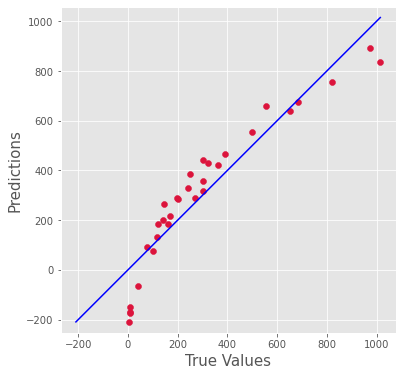

In [37]:
#Plot the true values and predictions.
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_hat, c='crimson')

p1 = max(max(y_hat), max(y_test))
p2 = min(min(y_hat), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

It looks like quite good prediction, however I noticed that when the true value is below 20, the prediction made is negative and thic can't happen as weight can't be negative.

In [38]:
print("Mean Square Error (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print("Root Mean Square Error (RMSE): %.2f" % np.sqrt(np.mean((y_hat - y_test) ** 2)))
print("R2-score: %.2f" % r2_score(y_test, y_hat) )
print("R2-score: %.2f" % mod1.score(X_test , y_test)) # this score should be the same as above

Mean Square Error (MSE): 10159.30
Root Mean Square Error (RMSE): 100.79
R2-score: 0.86
R2-score: 0.86


**RMSE** or Mean Squared Error depicts the dispersion of the data around the line of best fit. It is a good measure of accuraccy, but only to compare prediction errors of different models.Usually the lower amount the better.

### Model 2. Polynomial regression

Since earlier I concluded that the relationship between the weight and other fish attributes is not strictly linear, I chose to try a **Ploynomial distribution**.  ff we have non-linear data then Linear regression will not capable to draw a best-fit line and the predictions will not be optimal. Hence, polynomial regression would be better, as it identifyies the curvilineral relationship between independent and dependent variables.

In [39]:
# Import modules.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
np.set_printoptions(suppress=True) # Surpress the scientific notation

In [40]:
# Pre-process data i.e. generate polynomial features
poly=PolynomialFeatures(degree=2) #2 degrees seems appropriate looking at the plota above
X_train_poly=poly.fit_transform(X_train)
X_train_poly

array([[1.        , 0.25842697, 0.26470588, ..., 0.05294064, 0.08132097,
        0.12491538],
       [1.        , 0.13483146, 0.13235294, ..., 0.08828507, 0.05356296,
        0.03249689],
       [1.        , 0.47191011, 0.47478992, ..., 0.27383521, 0.4067497 ,
        0.60417839],
       ...,
       [1.        , 0.70786517, 0.70588235, ..., 0.4129871 , 0.52727266,
        0.67318435],
       [1.        , 0.51685393, 0.51260504, ..., 0.23217937, 0.33758838,
        0.49085287],
       [1.        , 0.49213483, 0.49579832, ..., 0.58932798, 0.44616681,
        0.33778274]])

In [41]:
mod2=LinearRegression()
#Fit the model.
mod2.fit(X_train_poly,y_train)
# Check intercept and coefficients for linear model.
print(mod1.intercept_)
print(mod1.coef_)

-242.92720409565965
[ 4649.81936936 -2288.89833472 -1840.57464075   628.15918847
   379.97153064]


In [42]:
# R squared, mean and standard deviation scores for CV
r2scores_poly = cross_val_score(mod2, X_train_poly, y_train, cv=4)
display_scores(r2scores_poly)

Scores: [0.97362601 0.97890879 0.96839274 0.96618655]
Mean: 0.9717785207222129
Standard deviation: 0.004924112240313175


I can already see that this model's scores are better than Linear Regression model scores!

In [43]:
print("R2-score of training data: %.2f" % r2_score(y_train, mod2.predict(X_train_poly)) )

R2-score of training data: 0.98


R squared is 98% in comparison to 91% for Linear model.

#### Evaluation of predictions

In [44]:
#Predicted data.
X_test_poly=poly.fit_transform(X_test)
y_hat_poly= mod2.predict(X_test_poly)
y_hat_poly

array([ 269.09063569,  148.53374823,  612.26927649,  633.51445627,
         79.18745104,  159.45373271,  192.93082813,    9.32957026,
         88.36285867,  321.83327719,   36.28259761,  261.23221158,
         38.65079937,  935.6845147 ,  203.48717996,  406.34490164,
        459.41147605,    6.25044047,  218.65489919,  628.08347161,
        117.89935874,  276.52987373,  252.72658623,  161.12920759,
        417.40271071,  810.14331493, 1125.79197279,  267.1084198 ,
        119.16113523,    6.0235502 ,  145.51162669])

In [45]:
#True data.
np.asanyarray(y_test)

array([ 242. ,  160. ,  556. ,  685. ,  100. ,  170. ,  200. ,    7.5,
         78. ,  320. ,   40. ,  250. ,    5.9, 1015. ,  197. ,  363. ,
        500. ,    9.8,  300. ,  650. ,  115. ,  300. ,  270. ,  145. ,
        390. ,  820. ,  975. ,  300. ,  120. ,    7. ,  140. ])

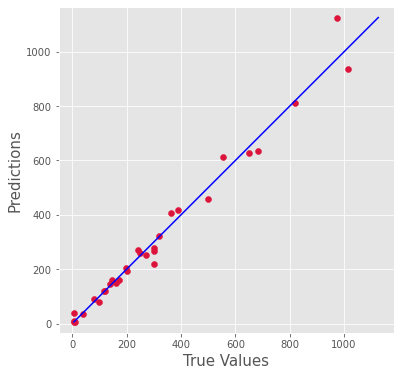

In [46]:
#Plot the true values and predictions.
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_hat_poly, c='crimson')

p1 = max(max(y_hat_poly), max(y_test))
p2 = min(min(y_hat_poly), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

This plot shows clearly how Polynomial regression model predicted much more accurately.

In [47]:
print("Mean Square Error (MSE): %.2f" % np.mean((y_hat_poly - y_test) ** 2))
print("Root Mean Square Error (RMSE): %.2f" % np.sqrt(np.mean((y_hat_poly - y_test) ** 2)))
print("R2-score: %.2f" % r2_score(y_test, y_hat_poly) )


Mean Square Error (MSE): 1657.76
Root Mean Square Error (RMSE): 40.72
R2-score: 0.98


**RMSE** is 40 (Linear regression was 100), this shows the predictions of Polynomial model are more accurate!

***

## Predict Species

Nex thing I want to do is predict the Species of the fish on a fish market using fish weight, lenghts, height and width. For this I will use **KNN** or K Nearest Neighbors classifier available in `sklearn`.

In [48]:
# Importing modules.
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#### Prep data
Firstly I need to, again, prep the data, i.e. divide my dataset into X and y. I want to also use a scaler to re-scale the distribution of values such that means of observed values is 0 and standard deviation 1. For this I will use `StandardScaler` reature. Finally, I want to divide my data into train and test sets using `train_test_split`. This will give random subsets.

In [49]:
# Create a new set of features for classification and new y variable.
features_classification=["Weight", "Length1", "Length2", "Length3", "Height", "Width"]
y2=df["Species"].values

In [50]:
#Rescale the data.
scaler_S = StandardScaler()
X2 = scaler_S.fit(df[features_classification]).transform(df[features_classification].astype(float))
X2[0:5]

array([[-0.42638282, -0.2744675 , -0.24895553, -0.05818953,  0.59098693,
        -0.21694243],
       [-0.2754932 , -0.18659255, -0.15688422,  0.05420147,  0.81322356,
        -0.04593985],
       [-0.11831652, -0.19757692, -0.13642393,  0.04483555,  0.78956462,
         0.18787145],
       [-0.04601525,  0.06604795,  0.11932969,  0.26961754,  0.87109768,
         0.04381256],
       [ 0.1646015 ,  0.08801669,  0.11932969,  0.31644713,  0.80488968,
         0.45006344]])

In [51]:
# Divide data into train and test sets using train_test_split()
X2_train, X2_test, y2_train, y2_test = train_test_split( X2, y2, test_size=0.2, random_state=0)
print ('Train set:', X2_train.shape,  y2_train.shape)
print ('Test set:', X2_test.shape,  y2_test.shape)

Train set: (124, 6) (124,)
Test set: (31, 6) (31,)


#### Model 3. KNN
**KNN** is a type of supervised learning algorithm which tries to predict the correct class for the test data by calculating the distance between the test data and all the training points and then looking for the nearest neighbors closest to to the training points. [13] <br>
First I want to see which k is the optimal for my model. I will do this by checking scores of each model from 1 to 31 ks.

In [52]:
# Look for the optimal k.
Ks = 31
mean_acc = np.zeros((Ks-1))
k_scores = []

#Assess scores for each k from 1 to 31.
for n in range(1,Ks):
    
    #Train Model and Predict.
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X2_train,y2_train)
    
    #Get cross_val_score for KNeighborsClassifier with k neighbours.
    scores = cross_val_score(neigh, X2_train, y2_train, cv=4, scoring='accuracy')
    
    #Append mean of scores for k neighbors to k_scores list.
    k_scores.append(scores.mean())
#Print scores table.
print(k_scores)

[0.7903225806451613, 0.7903225806451613, 0.7661290322580645, 0.782258064516129, 0.7741935483870968, 0.782258064516129, 0.7903225806451613, 0.782258064516129, 0.782258064516129, 0.7661290322580645, 0.7741935483870968, 0.7258064516129031, 0.7338709677419355, 0.6935483870967741, 0.6854838709677419, 0.6693548387096775, 0.6451612903225806, 0.6048387096774194, 0.5645161290322581, 0.5483870967741935, 0.5241935483870968, 0.5, 0.5, 0.4838709677419355, 0.4838709677419355, 0.4838709677419355, 0.4838709677419355, 0.47580645161290325, 0.47580645161290325, 0.47580645161290325]


In [53]:
#Look for the maximum score.
max(k_scores)

0.7903225806451613

Maximum score is 0.79 and it is the result of the k=1,2 and 7. Now I want to visualize what is the accuracy of these scores, to see out of the three which one to use.

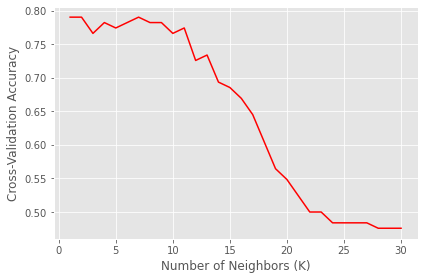

In [54]:
# Visualize the accuracy for k between 1 to 9.
plt.plot(range(1,Ks),k_scores,'r')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

All of this can also be done by using `GridSearch` module. I want to see whay would the output of this be.

In [55]:
#Set ks.
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [56]:
# Create a dictionary of grid parameters.
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [57]:
# Instantiate the grid.
grid = GridSearchCV(neigh, param_grid, cv=4, scoring='accuracy')
# Fit the grid with data.
grid.fit(X2_train, y2_train)
# Get results of best parameters.
grid.best_params_

{'n_neighbors': 1}

This makes it easier to decide on one best k!

In [58]:
#Create a model with one nearest neighbor.
k = 1
mod3 = KNeighborsClassifier(n_neighbors = k).fit(X2_train,y2_train)
mod3

KNeighborsClassifier(n_neighbors=1)

I want to evaluate this model to see if it is under/over fit.

In [59]:
# Use cross-validation to get an estimate general accuracy.
accuracy_scores_knn = cross_val_score(neigh, X2_train, y2_train, cv=4)
display_scores(accuracy_scores_knn)

Scores: [0.58064516 0.41935484 0.35483871 0.5483871 ]
Mean: 0.47580645161290325
Standard deviation: 0.09230260598596449


In [60]:
#Estimate train set accuracy.
print("Train set Accuracy: ", accuracy_score(y2_train, neigh.predict(X2_train)))

Train set Accuracy:  0.5241935483870968


Estimated accuracy of both model generalization and training set is around 0.5, with difference of 5%. This is a pretty poor score, and as a difference is around 5% it shows signs of  overfitting too. For the learning purposes I will continue with evaluating the predictions.

#### Evaluate predictions.

In [64]:
#Predict
y_hat_knn = neigh.predict(X2_test)
y_hat_knn

array(['Bream', 'Perch', 'Perch', 'Bream', 'Bream', 'Bream', 'Perch',
       'Perch', 'Perch', 'Bream', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Bream', 'Perch', 'Perch', 'Perch', 'Perch',
       'Bream', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Bream'], dtype=object)

In [65]:
# Compare the Predicted with true data.
y2_test

array(['Bream', 'Perch', 'Smelt', 'Perch', 'Bream', 'Bream', 'Roach',
       'Perch', 'Whitefish', 'Perch', 'Perch', 'Perch', 'Pike',
       'Whitefish', 'Perch', 'Roach', 'Bream', 'Smelt', 'Perch', 'Perch',
       'Perch', 'Bream', 'Pike', 'Smelt', 'Roach', 'Perch', 'Smelt',
       'Parkki', 'Perch', 'Perch', 'Bream'], dtype=object)

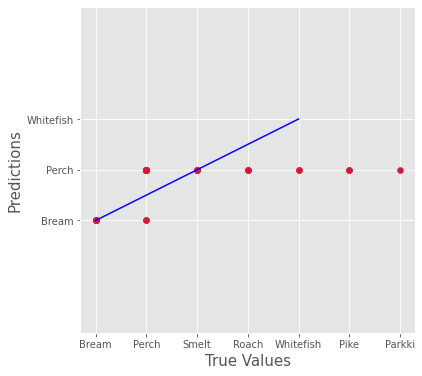

In [66]:
#Plot the true values and predictions.
plt.figure(figsize=(6,6))
plt.scatter(y2_test, y_hat_knn, c='crimson')

p1 = max(max(y_hat_knn), max(y2_test))
p2 = min(min(y_hat_knn), min(y2_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

The model does not look good and it proves the score is showing a good representation of the model performance.

In [67]:
print("Test set Accuracy: ", accuracy_score(y2_test, y_hat_knn))

Test set Accuracy:  0.5483870967741935


## References

[1] scikit-learn. Available at http://scikit-learn.org.<br>
[2] scikit-learn. Install. Available at http://scikit-learn.org/stable/install.html. <br>
[3] Anaconda. Available at https://www.anaconda.com/. <br>
[4] NumPy documentation. Available at https://numpy.org/doc/stable/index.html. <br>
[5] SciPy documentation. Available at https://scipy.github.io/devdocs/index.html. <br>
[6] Matplotlib user guide. Available at https://matplotlib.org/stable/users/index. <br>
[7] Stack abuse. Available at: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/ <br>
[8] Towards Data Science. Cross Validation Explained. Available at: https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85 <br>
[9] Edgar, T. W., & Manz, D. O. (2017). Machine Learning. Research Methods for Cyber Security, 153–173. https://doi.org/10.1016/b978-0-12-805349-2.00006-6 <br>
[10] Investopedia. Regression. Available at: https://www.investopedia.com/terms/r/regression.asp <br>
[11] Towards data science. Machine learning classifiers. Available at: https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623 <br>
[12] Analytics vidhya. All you need to know about polynomial regression. Available at: https://www.analyticsvidhya.com/blog/2021/07/all-you-need-to-know-about-polynomial-regression/ <br>
[13] Medium. k-nearest neighbor. Available at: https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4
